In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import png
from pprint import pprint
# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

## Perform API Calls

In [3]:
city_name = []
city_id = []
temp_max = []
humidity = []
wind_speed = []
clouds = []
lat = []
lng = []

api_key = api_keys.api_key
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={api_key}&q={city}&units={units}"
weather_response = requests.get(query_url)
weather_json = weather_response.json() 

print('Beginning data retrieval...')
print("---------------------------")
counter = 1
for city in cities:
    print(f"Processing {city} # {counter}")
    print(query_url)
    try:
        query_url = f"{url}appid={api_key}&q={city}&units={units}"
        weather_response = requests.get(query_url)
        weather_json = weather_response.json() 
        city_name.append(weather_json['name'])
        city_id.append(weather_json['id'])
        temp_max.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        wind_speed.append(weather_json['wind']['speed'])
        clouds.append(weather_json['clouds']['all'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
    except KeyError:
        print("City not found, escaping...")
        continue
    counter += 1
print("------------------------")
print("Data retrieval complete!")

Beginning data retrieval...
---------------------------
Processing illoqqortoormiut # 1
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=khatanga&units=imperial
City not found, escaping...
Processing grindavik # 1
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=illoqqortoormiut&units=imperial
Processing wallacetown # 2
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=grindavik&units=imperial
Processing ushuaia # 3
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=wallacetown&units=imperial
Processing lecce # 4
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=ushuaia&units=imperial
Processing nouakchott # 5
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=lecce&units=imperial
Processing bethel # 6
http://api.openweathermap.org/data/2.5/weather?appid=3c9877c

Processing harper # 53
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=buraydah&units=imperial
Processing geraldton # 54
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=harper&units=imperial
Processing provideniya # 55
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=geraldton&units=imperial
Processing tsihombe # 56
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=provideniya&units=imperial
City not found, escaping...
Processing belushya guba # 56
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=tsihombe&units=imperial
City not found, escaping...
Processing chara # 56
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=belushya guba&units=imperial
Processing solnechnyy # 57
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698

Processing cabo san lucas # 106
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=naze&units=imperial
Processing mehamn # 107
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=cabo san lucas&units=imperial
Processing yongan # 108
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=mehamn&units=imperial
Processing halalo # 109
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=yongan&units=imperial
City not found, escaping...
Processing canico # 109
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=halalo&units=imperial
Processing northam # 110
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=canico&units=imperial
Processing yuci # 111
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=northam&units=imperial
Processing yumen # 1

City not found, escaping...
Processing kaitangata # 157
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=marcona&units=imperial
Processing faanui # 158
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=kaitangata&units=imperial
Processing gamba # 159
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=faanui&units=imperial
Processing olafsvik # 160
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=gamba&units=imperial
City not found, escaping...
Processing kidal # 160
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=olafsvik&units=imperial
Processing pecos # 161
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=kidal&units=imperial
Processing boca do acre # 162
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=pecos&units=im

Processing zaraza # 207
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=sabha&units=imperial
Processing tairua # 208
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=zaraza&units=imperial
Processing vershino-shakhtaminskiy # 209
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=tairua&units=imperial
Processing pitimbu # 210
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=vershino-shakhtaminskiy&units=imperial
Processing san patricio # 211
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=pitimbu&units=imperial
Processing narsaq # 212
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=san patricio&units=imperial
Processing kamenka # 213
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=narsaq&units=imperial
Processing bez

City not found, escaping...
Processing tazovskiy # 260
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=ust-kamchatsk&units=imperial
Processing shenjiamen # 261
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=tazovskiy&units=imperial
Processing egvekinot # 262
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=shenjiamen&units=imperial
Processing manoel urbano # 263
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=egvekinot&units=imperial
Processing nanortalik # 264
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=manoel urbano&units=imperial
Processing ibirama # 265
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=nanortalik&units=imperial
Processing ancud # 266
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=ibirama

Processing brooks # 317
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=cedar city&units=imperial
Processing bilibino # 318
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=brooks&units=imperial
Processing laibin # 319
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=bilibino&units=imperial
Processing kenora # 320
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=laibin&units=imperial
Processing stromness # 321
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=kenora&units=imperial
Processing inisa # 322
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=stromness&units=imperial
Processing bridgetown # 323
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=inisa&units=imperial
Processing havoysund # 324
http://api.openweat

Processing alotau # 371
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=angoche&units=imperial
City not found, escaping...
Processing aksarka # 371
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=alotau&units=imperial
Processing sola # 372
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=aksarka&units=imperial
Processing samalaeulu # 373
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=sola&units=imperial
City not found, escaping...
Processing saleaula # 373
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=samalaeulu&units=imperial
City not found, escaping...
Processing vao # 373
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=saleaula&units=imperial
Processing marsa matruh # 374
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173

Processing gimli # 417
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=salalah&units=imperial
Processing gambela # 418
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=gimli&units=imperial
Processing edson # 419
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=gambela&units=imperial
Processing alto araguaia # 420
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=edson&units=imperial
Processing pontes e lacerda # 421
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=alto araguaia&units=imperial
Processing tsabong # 422
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=pontes e lacerda&units=imperial
Processing winton # 423
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=tsabong&units=imperial
Processing negele # 424
htt

Processing banfora # 471
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=porto velho&units=imperial
Processing pontianak # 472
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=banfora&units=imperial
Processing straumen # 473
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=pontianak&units=imperial
Processing marau # 474
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=straumen&units=imperial
Processing salinopolis # 475
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=marau&units=imperial
Processing mount darwin # 476
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=salinopolis&units=imperial
Processing sistranda # 477
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=mount darwin&units=imperial
Processing saurimo # 4

Processing madera # 523
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=shar&units=imperial
Processing bandarbeyla # 524
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=madera&units=imperial
Processing opuwo # 525
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=bandarbeyla&units=imperial
Processing caravelas # 526
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=opuwo&units=imperial
Processing tilichiki # 527
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=caravelas&units=imperial
Processing singaraja # 528
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=tilichiki&units=imperial
Processing pochutla # 529
http://api.openweathermap.org/data/2.5/weather?appid=3c9877cd1295934820173d232789698b&q=singaraja&units=imperial
Processing ponnani # 530
http://api.

In [6]:
weather_dict = {
    "City": city_name,
    "City id": city_id,
    "Temp": temp_max,
    "Humidity": humidity,
    "Wind Speed": wind_speed,
    "Clouds": clouds,
    "Lat": lat,
    "Lng": lng
}
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv("Weather_Data.csv")
weather_data.head()

,City,City id,Temp,Humidity,Wind Speed,Clouds,Lat,Lng
0,Grindavik,3416888,46.40,81,21.92,75,63.84,-22.43
1,Wallacetown,2656708,57.20,93,6.93,75,55.46,-4.61
2,Ushuaia,3833367,33.80,80,5.82,90,-54.81,-68.31
3,Lecce,6542124,78.80,83,2.24,0,40.36,18.17
4,Nouakchott,2377450,76.35,100,12.28,12,18.08,-15.98


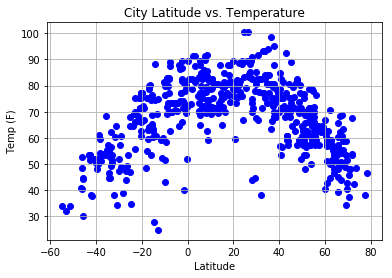

In [8]:
fig = plt.scatter(lat, temp_max, marker="o", color="blue")
plt.grid()
plt.title("City Latitude vs. Temperature")
plt.ylabel("Temp (F)")
plt.xlabel("Latitude")
plt.savefig("Temp vs Lat.png")
plt.show()

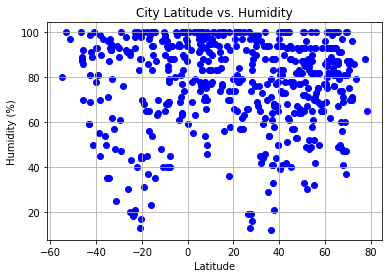

In [9]:
fig = plt.scatter(lat, humidity, marker="o", color="blue")
plt.grid()
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig("Humidity vs Lat.png")
plt.show()

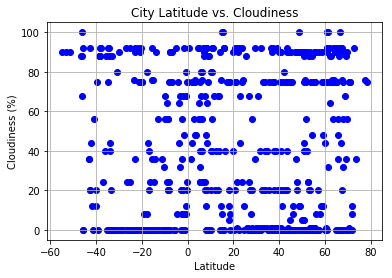

In [12]:
fig = plt.scatter(lat, clouds, marker="o", color="blue")
plt.grid()
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig("Cloudiness vs Lat.png")
plt.show()

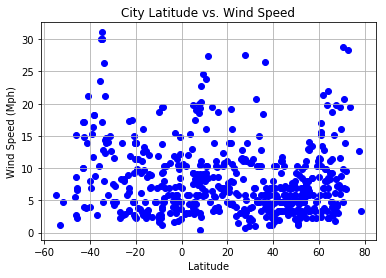

In [11]:
fig = plt.scatter(lat, wind_speed, marker="o", color="blue")
plt.grid()
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (Mph)")
plt.xlabel("Latitude")
plt.savefig("Wind Speed vs Lat.png")
plt.show()